In [1]:
%load_ext autoreload
%autoreload 2

# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
print(os.listdir("./dataset/kaggle_input"))

from util.util_cnn import CNNModel, data_loaders, train, init_and_train_and_store, \
    params_to_filename, params_from_filename, first_mnist_batch, test, load_mnist_v4_models

/Users/jmaess/miniconda3/envs/msc/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['test.csv', 'train.csv', 'sample_submission.csv']


In [6]:
del CNNModel
from util.util_cnn import CNNModel

In [3]:
# load data and pretrained models
data, target = first_mnist_batch()

model_dict = load_mnist_v4_models()
model_d3 = model_dict[d3_tag]

RuntimeError: Error(s) in loading state_dict for CNNModel:
	Missing key(s) in state_dict: "seq.5.weight", "seq.5.bias". 
	Unexpected key(s) in state_dict: "seq.7.weight", "seq.7.bias", "seq.3.weight", "seq.3.bias". 

In [31]:
train_loader, test_loader = data_loaders()

<a id="5"></a> <br>
### Convolutional Neural Network (CNN)
- CNN is well adapted to classify images.
- You can learn CNN basics: https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial
- **Steps of CNN:**
    1. Import Libraries
    1. Prepare Dataset
        - Totally same with previous parts.
        - We use same dataset so we only need train_loader and test_loader. 
    1. Convolutional layer: 
        - Create feature maps with filters(kernels).
        - Padding: After applying filter, dimensions of original image decreases. However, we want to preserve as much as information about the original image. We can apply padding to increase dimension of feature map after convolutional layer.
        - We use 2 convolutional layer.
        - Number of feature map is out_channels = 16
        - Filter(kernel) size is 5*5
    1. Pooling layer: 
        - Prepares a condensed feature map from output of convolutional layer(feature map) 
        - 2 pooling layer that we will use max pooling.
        - Pooling size is 2*2
    1. Flattening: Flats the features map
    1. Fully Connected Layer: 
        - Artificial Neural Network that we learnt at previous part.
        - Or it can be only linear like logistic regression but at the end there is always softmax function.
        - We will not use activation function in fully connected layer.
        - You can think that our fully connected layer is logistic regression.
        - We combine convolutional part and logistic regression to create our CNN model.
    1. Instantiate Model Class
        - create model
    1. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training). 
- Thanks to convolutional layer, model learnt better and accuracy(almost 98%) is better than accuracy of ANN. Actually while tuning hyperparameters, increase in iteration and expanding convolutional neural network can increase accuracy but it takes too much running time that we do not want at kaggle.   
        

In [24]:
del CNNModel
from util.util_cnn import CNNModel

In [27]:
v4 = CNNModel(version=4, cb1_channels=[20,20], cb2_channels=[30,30])
data.shape, v4.forward(data).shape

(torch.Size([100, 1, 28, 28]), torch.Size([100, 10]))

In [28]:
v5 = CNNModel(version=5, Fs=[3,3])

In [29]:
data.shape, v5.forward(data).shape

(torch.Size([100, 1, 28, 28]), torch.Size([100, 10]))

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
count_parameters(model1)

9794

In [ ]:
count_parameters(CNNModel(seed=0, cb1_channels=[16], cb2_channels=[32]))

18378

In [ ]:
# model = CNNModel(seed=0, cb1_channels=[16, 16], cb2_channels=[32, 32])
model

CNNModel(
  (seq): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (6): ReLU()
    (7): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [ ]:
model1.forward(torch.ones((1, 1, 28, 28)))

tensor([[-0.0068, -0.0271,  0.0175,  0.0013,  0.0141,  0.0292, -0.0434,  0.0171,
          0.0076, -0.0208]], grad_fn=<AddmmBackward0>)

In [ ]:
cb1_channels=[16, 16]
cb2_channels=[32, 32]
seed=0
# model2, iteration_list2, loss_list2, accuracy_list2 = init_and_train(seed=seed, cb1_channels=cb1_channels, cb2_channels=cb2_channels)

In [ ]:
fn = params_to_filename(seed, cb1_channels, cb2_channels)
torch.save(model2.state_dict(), "./models/"+fn)

In [4]:
from multiprocessing import Pool

In [ ]:
del init_and_train_and_store
from util.util_cnn import init_and_train_and_store

In [41]:
ret =  train(v5, 10000, train_loader=train_loader, test_loader=test_loader, device="mps")

Iteration: 500  Loss: 0.9558092355728149  Accuracy: 73.6547622680664 %
Iteration: 1000  Loss: 0.784359872341156  Accuracy: 71.1547622680664 %
Iteration: 1500  Loss: 0.8144357204437256  Accuracy: 71.13095092773438 %
Iteration: 2000  Loss: 0.8575326204299927  Accuracy: 71.02381134033203 %
Iteration: 2500  Loss: 1.0229957103729248  Accuracy: 69.51190185546875 %
Iteration: 3000  Loss: 0.793943464756012  Accuracy: 73.95237731933594 %
Iteration: 3500  Loss: 0.9838947653770447  Accuracy: 67.78571319580078 %
Iteration: 4000  Loss: 0.8038521409034729  Accuracy: 72.30952453613281 %
Iteration: 4500  Loss: 0.908379316329956  Accuracy: 75.01190185546875 %
Iteration: 5000  Loss: 0.8181433081626892  Accuracy: 71.36904907226562 %
Iteration: 5500  Loss: 0.8563621044158936  Accuracy: 75.42857360839844 %
Iteration: 6000  Loss: 0.8155134916305542  Accuracy: 69.29761505126953 %
Iteration: 6500  Loss: 0.7205958366394043  Accuracy: 75.10713958740234 %
Iteration: 7000  Loss: 0.7332497835159302  Accuracy: 75.0

In [34]:
ret2 =  train(v4, 1000, train_loader=train_loader, test_loader=test_loader)

Iteration: 500  Loss: 0.07489237189292908  Accuracy: 97.01190185546875 %
Iteration: 1000  Loss: 0.028907932341098785  Accuracy: 98.01190185546875 %


In [48]:
init_and_train_and_store({'v':4, 'seed':10, 'cb1_channels': [8, 8, 8], 'cb2_channels': [16, 16, 16]}, device='mps')

Start training model with params={'v': 4, 'seed': 10, 'cb1_channels': [8, 8, 8], 'cb2_channels': [16, 16, 16]}.
CNNModel(
  (seq): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (8): ReLU()
    (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Flatten(start_dim=1, end_dim=-1)
    (15): Linear(in_features=256, out_features=10, bias=True)
  )
)
Iteration: 500  Loss: 2.251085042953491  Accuracy: 24.8214282989501

(CNNModel(
   (seq): Sequential(
     (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1))
     (5): ReLU()
     (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (7): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
     (8): ReLU()
     (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (10): ReLU()
     (11): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (12): ReLU()
     (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (14): Flatten(start_dim=1, end_dim=-1)
     (15): Linear(in_features=256, out_features=10, bias=True)
   )
 ),
 [50,
  100,
  150,
  200,
  250,
  300,
  350,
  400,
  450,
  500,
  550,
  600,
  650,
  700,
  750,
  800,
  850,
  900,
  950,
  1000,
  1050,
  1100,
  

In [43]:
init_and_train_and_store({'v':5, 'seed':0, 'Fs': [3,3]}, device='mps', n_iters=20000)

Start training model with params={'v': 5, 'seed': 0, 'Fs': [3, 3]}.
CNNModel(
  (seq): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): AvgPool2d(kernel_size=28, stride=28, padding=0)
    (5): Flatten(start_dim=1, end_dim=-1)
  )
)
Iteration: 500  Loss: 2.3055644035339355  Accuracy: 9.940476417541504 %
Iteration: 1000  Loss: 2.287250280380249  Accuracy: 10.071428298950195 %
Iteration: 1500  Loss: 2.282106637954712  Accuracy: 11.369047164916992 %
Iteration: 2000  Loss: 2.2811038494110107  Accuracy: 13.630951881408691 %
Iteration: 2500  Loss: 2.2627336978912354  Accuracy: 14.857142448425293 %


TypeError: params_to_filename() got an unexpected keyword argument 'v'

In [49]:
params_from_filename(params_to_filename(**{'v':5, 'seed':0, 'Fs': [3,3]}))

{'v': 5, 'seed': 0, 'Fs': [3, 3]}

In [11]:
seeds = [0, 1, 2, 3]
channel_configs = [([8,], [16,]), ([8,8,], [16,16,]), ([8,8,8,], [16,16,16,])]

configs = [(s, *cc) for s in seeds for cc in channel_configs]

# for c in configs: init_and_train_and_store(*c)
len(configs)

12

In [16]:
with Pool(4) as p:
    returns = p.map(init_and_train_and_store, configs)


Start training model with seed=0, cb1_channels=[8], cb2_channels=[16].
Start training model with seed=0, cb1_channels=[8, 8], cb2_channels=[16, 16].
Start training model with seed=1, cb1_channels=[8], cb2_channels=[16].
Start training model with seed=0, cb1_channels=[8, 8, 8], cb2_channels=[16, 16, 16].
Iteration: 500  Loss: 0.12259461730718613  Accuracy: 95.57142639160156 %
Iteration: 500  Loss: 0.13435696065425873  Accuracy: 96.04762268066406 %
Iteration: 500  Loss: 0.12315607070922852  Accuracy: 96.69047546386719 %
Iteration: 1000  Loss: 0.05970239266753197  Accuracy: 97.11904907226562 %
Iteration: 1000  Loss: 0.041074205189943314  Accuracy: 97.3452377319336 %
Iteration: 500  Loss: 0.3995364010334015  Accuracy: 90.57142639160156 %
Iteration: 1500  Loss: 0.04431737959384918  Accuracy: 97.28571319580078 %
Iteration: 1500  Loss: 0.05681401118636131  Accuracy: 97.38095092773438 %
Iteration: 1000  Loss: 0.04913037642836571  Accuracy: 97.25 %
Iteration: 2000  Loss: 0.04290026053786278  Ac

In [17]:
len(returns)

12

In [19]:
configs

[(0, [8], [16]),
 (0, [8, 8], [16, 16]),
 (0, [8, 8, 8], [16, 16, 16]),
 (1, [8], [16]),
 (1, [8, 8], [16, 16]),
 (1, [8, 8, 8], [16, 16, 16]),
 (2, [8], [16]),
 (2, [8, 8], [16, 16]),
 (2, [8, 8, 8], [16, 16, 16]),
 (3, [8], [16]),
 (3, [8, 8], [16, 16]),
 (3, [8, 8, 8], [16, 16, 16])]

In [18]:
for model, iteration_list, loss_list, accuracy_list in returns:
    print(accuracy_list[-1])

tensor(97.9048)
tensor(97.8571)
tensor(97.6667)
tensor(97.9286)
tensor(98.0595)
tensor(98.0119)
tensor(97.8571)
tensor(97.6786)
tensor(97.9524)
tensor(97.9762)
tensor(97.8571)
tensor(98.0952)


In [ ]:
# torch.save(model.state_dict(), "./models/"+filename(cb1_channels, cb2_channels, seed=0))

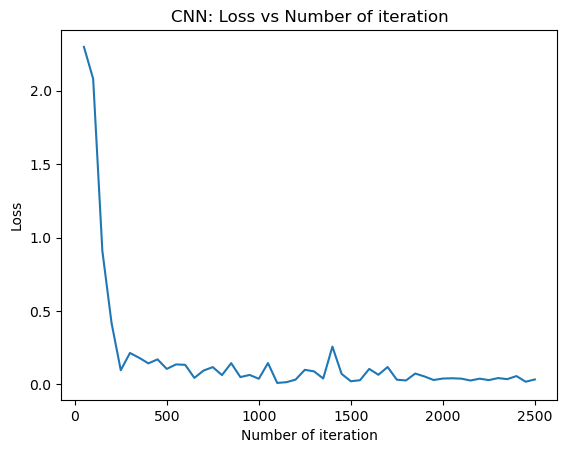

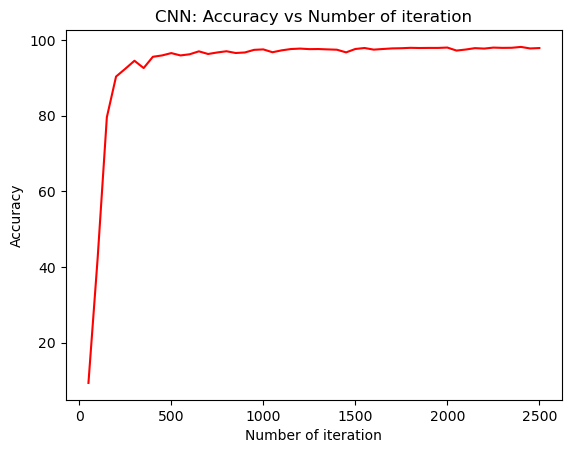

In [ ]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

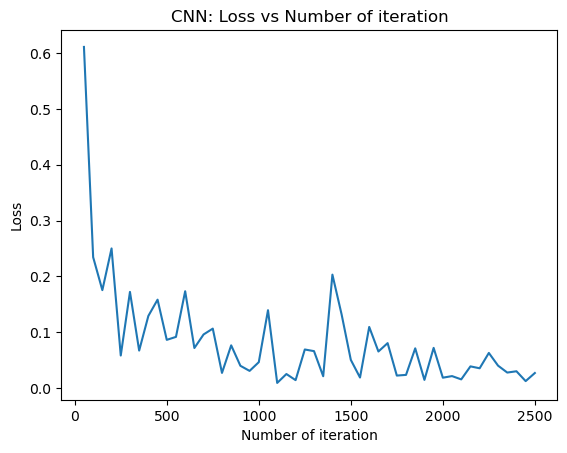

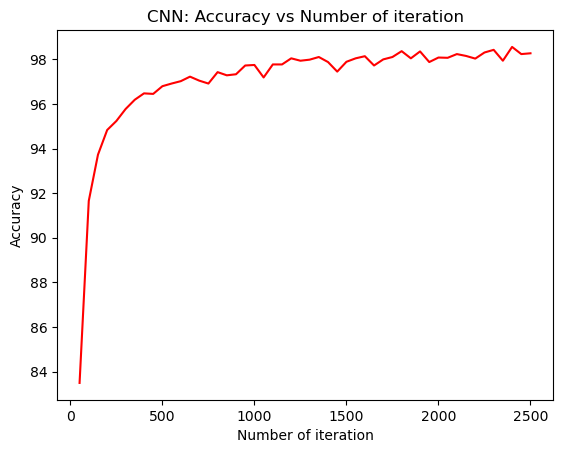

In [ ]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

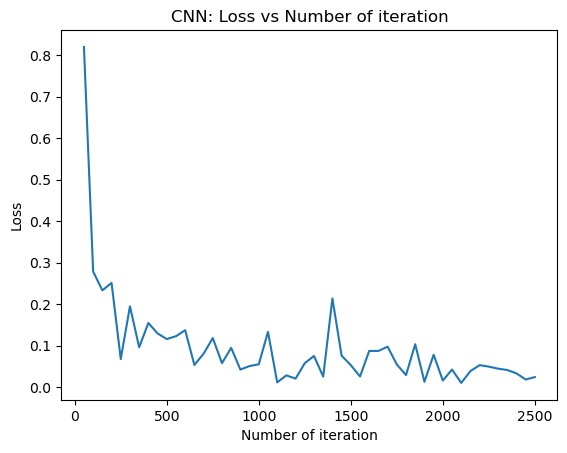

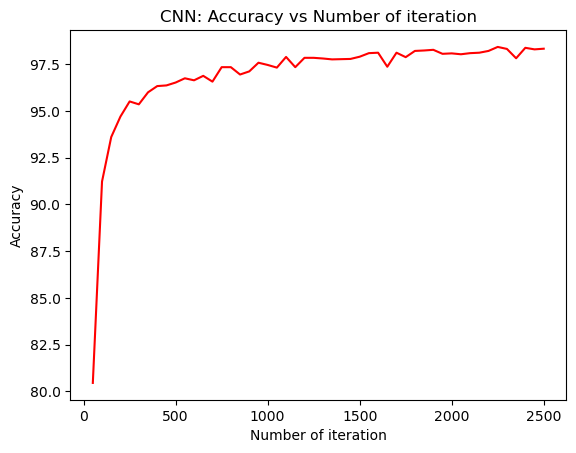

In [ ]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()